In [1]:
import json
from PIL import Image
from IPython.display import display
import numpy as np
import pandas as pd

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel
from torch.nn.utils.rnn import pad_sequence
import torch

# tokenizer = AutoTokenizer.from_pretrained("Hate-speech-CNERG/dehatebert-mono-english")

# model = AutoModelForSequenceClassification.from_pretrained("Hate-speech-CNERG/dehatebert-mono-english")

In [3]:
# importing the data
datafolder = '../../data/hateful_memes/'
training = datafolder+'train.jsonl'

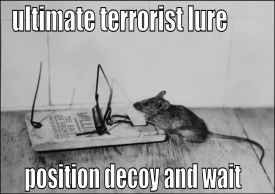

0 ultimate terrorist lure position decoy and wait
[{'label': 'HATE', 'score': 0.7801583409309387}]


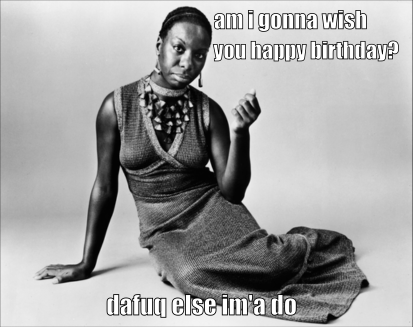

0 am i gonna wish you happy birthday? dafuq else im'a do
[{'label': 'NON_HATE', 'score': 0.9668437242507935}]


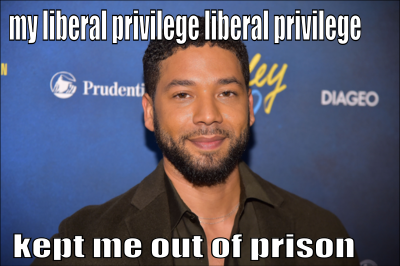

0 my liberal privilege liberal privilege kept me out of prison
[{'label': 'NON_HATE', 'score': 0.921051561832428}]


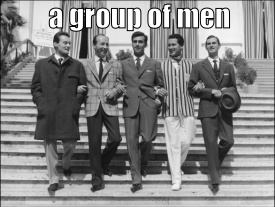

0 a group of men
[{'label': 'NON_HATE', 'score': 0.9766136407852173}]


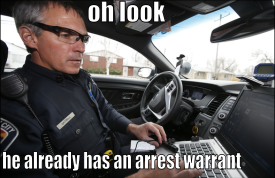

0 oh look he already has an arrest warrant
[{'label': 'NON_HATE', 'score': 0.9667038917541504}]


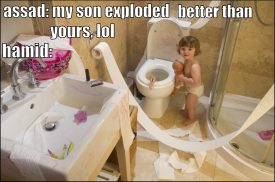

0 assad: my son exploded better than yours, lol hamid:
[{'label': 'NON_HATE', 'score': 0.8855977058410645}]


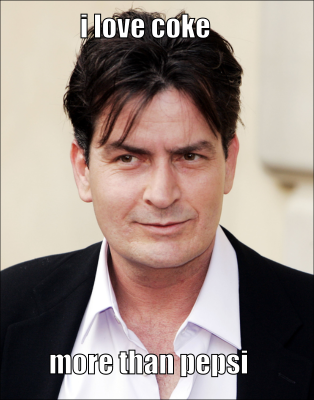

0 i love coke more than pepsi
[{'label': 'NON_HATE', 'score': 0.9642754197120667}]


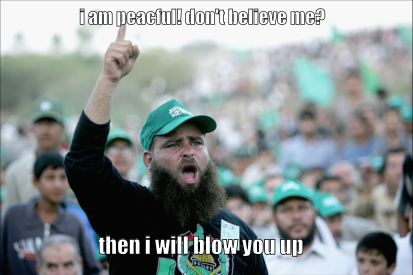

1 i am peacful! don't believe me? then i will blow you up
[{'label': 'NON_HATE', 'score': 0.960813045501709}]


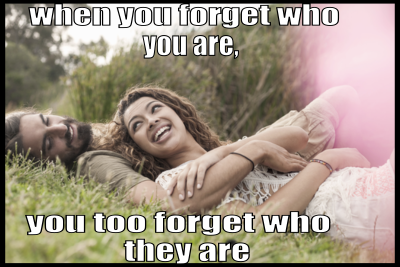

0 when you forget who you are, you too forget who they are
[{'label': 'NON_HATE', 'score': 0.8967077732086182}]


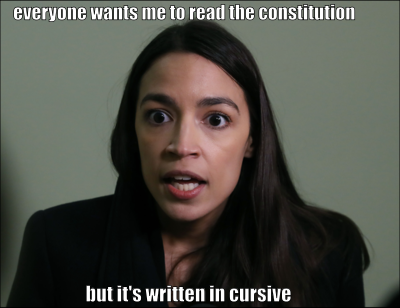

0 everyone wants me to read the constitution but it's written in cursive
[{'label': 'NON_HATE', 'score': 0.9730696678161621}]


In [5]:
with open(training, 'r') as file:
    
    # Read each line of the file and parse it as JSON
    for i, line in enumerate(file.readlines()[1000:1010]):
        data = json.loads(line)
        img = Image.open(datafolder+data['img'])
        img = img.reduce(2)
        display(img)
        print(data['label'], data['text'])
        # tokenized_input = tokenizer(data['text']).tokens()
        print(model(data['text']))
        

In [21]:
with open(training, 'r') as file:
    
    # Read each line of the file and parse it as JSON
    for i, line in enumerate(file.readlines()[1000:1010]):
        data = json.loads(line)
        tokenized = tokenizer(data['text'], return_tensors="pt")["input_ids"][0]
        padded_tokens = pad_sequence(tokenized, batch_first=True)
        vector = model(data['text'])[0]
        print(np.asarray(vector).size/768)
        model(data['text'])
        # print(data['label'], data['text'])
        # tokenized_input = tokenizer(data['text']).tokens()
        # print(model(data['text']))

11.0
18.0
16.0
6.0
10.0
18.0
10.0
20.0
15.0
17.0


In [4]:
df_train = pd.read_json(training, lines = True)

In [5]:
df_train

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...,...
8495,10423,img/10423.png,1,nobody wants to hang auschwitz me
8496,98203,img/98203.png,1,when god grants you a child after 20 years of ...
8497,36947,img/36947.png,1,gays on social media: equality! body positivit...
8498,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...
